In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [3]:
aq_df = pd.read_csv('Data.csv')
aq_df.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.
NaN values are ignored automatically while using .mean()

In [4]:
grouped = aq_df.groupby('state', observed = True)['PM2.5']
display(grouped.mean())

state
Andhra Pradesh        35.049347
Arunachal Pradesh     22.674513
Assam                 57.962372
Bihar                 76.918759
Chandigarh            56.666803
Chhattisgarh          28.761571
Delhi                104.100918
Gujarat               52.462657
Haryana               72.371070
Himachal Pradesh      62.516878
Jammu and Kashmir     28.574696
Jharkhand             54.281545
Karnataka             28.894840
Kerala                29.404793
Madhya Pradesh        45.874375
Maharashtra           43.491415
Manipur               34.911856
Meghalaya             24.513390
Mizoram               11.784922
Nagaland              33.439550
Odisha                52.109504
Puducherry            22.854171
Punjab                52.243166
Rajasthan             54.230341
Sikkim                13.474286
Tamil Nadu            31.289620
Telangana             38.114469
Tripura               57.927642
Uttar Pradesh         70.893996
Uttarakhand           36.788767
West Bengal           54.611086
Na

In [5]:
display(grouped.mean().idxmax())

'Delhi'

Thus, Delhi has the highest average PM2.5 level across all years and all stations with 104.100918.

In [6]:
#2.
aq_df['Timestamp'] = pd.to_datetime(aq_df['Timestamp'])
display(aq_df.loc[aq_df['Timestamp'].dt.year == 2023])

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
1229151,2023-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1229152,2023-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
1229153,2023-01-01,"Adarsh Nagar, Jaipur - RSPCB",52.502842,85.579053,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
1229154,2023-01-01,"Airoli, Navi Mumbai - MPCB",NaN,NaN,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
1229155,2023-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1433911,2023-12-31,"Worli, Mumbai - MPCB",47.100625,136.581481,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1433912,2023-12-31,"Yamunapuram, Bulandshahr - UPPCB",67.694737,127.273684,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1433913,2023-12-31,"Yerramukkapalli, Kadapa - APPCB",NaN,NaN,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1433914,2023-12-31,"Zero Point GICI, Gangtok - SSPCB",10.938437,25.018125,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [7]:
aq_df.loc[(aq_df['Timestamp'].dt.year == 2023) & (aq_df['PM2.5'] > 300)].groupby('state', observed = True)['Timestamp'].nunique()

state
Andhra Pradesh     2
Assam             21
Bihar             47
Delhi             49
Gujarat            4
Haryana           21
Jharkhand          1
Karnataka         14
Madhya Pradesh     8
Maharashtra       30
Odisha             1
Rajasthan         14
Tamil Nadu         3
Telangana          1
Tripura            1
Uttar Pradesh     24
Name: Timestamp, dtype: int64

In [8]:
aq_df.loc[(aq_df['Timestamp'].dt.year == 2023) & (aq_df['PM2.5'] > 300)].groupby('state', observed = True)['Timestamp'].nunique().idxmax()

'Delhi'

Thus, Delhi has had the most number of days with higher than 300 micrograms/m^3 of PM2.5 levels in 2023 with 49 such days.

In [9]:
#3.
aq_df.loc[(aq_df['Timestamp'].dt.year == 2023)].groupby('state', observed = True)['PM2.5'].std()

state
Andhra Pradesh       26.470621
Arunachal Pradesh    10.486218
Assam                61.501105
Bihar                63.734196
Chandigarh           37.715544
Chhattisgarh         20.076441
Delhi                82.797106
Gujarat              33.210780
Haryana              52.534649
Himachal Pradesh     45.573949
Jammu and Kashmir    17.571078
Jharkhand            40.211922
Karnataka            26.745988
Kerala               17.071595
Madhya Pradesh       40.026787
Maharashtra          39.960771
Manipur              31.033988
Meghalaya            22.994036
Mizoram               8.181937
Nagaland             20.281620
Odisha               36.130086
Puducherry           15.927181
Punjab               33.583028
Rajasthan            39.929352
Sikkim               19.351219
Tamil Nadu           22.017688
Telangana            18.842444
Tripura              46.884462
Uttar Pradesh        45.749190
Uttarakhand          20.194756
West Bengal          34.347047
Name: PM2.5, dtype: float64

In [10]:
aq_df.loc[(aq_df['Timestamp'].dt.year == 2023)].groupby('state', observed = True)['PM2.5'].std().idxmax()

'Delhi'

Yet again, we have Delhi at the top of the list. This time for most variability in PM2.5 levels across 2023.

In [11]:
#4.
aq_df.loc[(aq_df['Timestamp'].dt.year == 2020) | (aq_df['Timestamp'].dt.year == 2021)].groupby('state', observed = True)['PM2.5'].mean()

state
Andhra Pradesh        31.861788
Arunachal Pradesh     14.751325
Assam                 61.463611
Bihar                 75.120788
Chandigarh            39.586587
Chhattisgarh          24.863968
Delhi                100.613293
Gujarat               49.954478
Haryana               71.858425
Himachal Pradesh            NaN
Jammu and Kashmir     31.909474
Jharkhand             57.042476
Karnataka             27.604270
Kerala                26.407500
Madhya Pradesh        44.957182
Maharashtra           44.668592
Manipur                     NaN
Meghalaya             16.579606
Mizoram               14.323350
Nagaland              32.389944
Odisha                46.927677
Puducherry            20.198304
Punjab                49.561781
Rajasthan             56.182164
Sikkim                      NaN
Tamil Nadu            29.679225
Telangana             37.936372
Tripura               50.124667
Uttar Pradesh         87.086041
Uttarakhand                 NaN
West Bengal           55.807568
Na

In [12]:
aq_df.loc[(aq_df['Timestamp'].dt.year == 2020) | (aq_df['Timestamp'].dt.year == 2021)].groupby('state', observed = True)['PM2.5'].mean().idxmin()

'Mizoram'

Mizoram had the lowest average PM2.5 levels in the covid years.

# Temporal aggregation

# 1.

In [13]:
aq_df.loc[aq_df.loc[(aq_df['Timestamp'].dt.year == 2020) & (aq_df['Timestamp'].dt.month == 8), 'PM2.5'].idxmax(), 'station']

'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'

In [14]:
season_map = {
    1: 'Winter', 2: 'Winter', 3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon', 10: 'Unknown',
    11: 'Unknown', 12: 'Winter'
}
aq_df['season'] = aq_df['Timestamp'].dt.month.map(season_map)

In [15]:
display(aq_df)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,season
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh,Winter
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh,Winter
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan,Winter
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra,Winter
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter
...,...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra,Winter
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh,Winter
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh,Winter
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim,Winter


In [16]:
aq_df.loc[aq_df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'].groupby('season')['PM2.5'].mean()

season
Monsoon    26.942495
Summer     38.855684
Unknown    48.999789
Winter     56.439003
Name: PM2.5, dtype: float64

Winter has the highest pollution possibly because cool air traps dust particles.

In [17]:
aq_df['day'] = aq_df['Timestamp'].dt.day_name()
display(aq_df)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,season,day
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh,Winter,Sunday
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh,Winter,Sunday
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan,Winter,Sunday
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra,Winter,Sunday
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra,Winter,Tuesday
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh,Winter,Tuesday
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh,Winter,Tuesday
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim,Winter,Tuesday


In [18]:
LBSNK_data = aq_df.loc[(aq_df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB') & (aq_df['Timestamp'].dt.year == 2021)]
day_map = {'Sunday': 'Weekend', 'Saturday': 'Weekend', 'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday', 'Thurday': 'Weekday', 'Friday': 'Weekday'}
aq_df['day_type'] = aq_df['Timestamp'].dt.day_name().map(day_map)

In [19]:
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
aq_df['month'] = aq_df['Timestamp'].dt.month.map(month_map)

In [20]:
aq_df.loc[aq_df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'].groupby(['month', 'day_type'])['PM2.5'].mean().unstack()

day_type,Weekday,Weekend
month,,
April,37.970201,34.704974
August,32.416780,12.131035
December,55.736345,62.964710
February,51.987011,47.758231
January,61.743771,62.821246
July,17.045541,12.730319
June,33.404198,49.491614
March,48.265857,49.749830
May,29.778533,32.863587


In [21]:
display(aq_df)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,season,day,day_type,month
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh,Winter,Sunday,Weekend,January
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh,Winter,Sunday,Weekend,January
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan,Winter,Sunday,Weekend,January
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra,Winter,Sunday,Weekend,January
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,Sunday,Weekend,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra,Winter,Tuesday,Weekday,December
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh,Winter,Tuesday,Weekday,December
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh,Winter,Tuesday,Weekday,December
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim,Winter,Tuesday,Weekday,December


In [22]:
aq_df['is_weekend'] = aq_df['Timestamp'].dt.dayofweek.isin([5, 6])

In [23]:
aq_df.drop('day_type', axis = 1, inplace = True)

In [24]:
weekday_monthly_avg = aq_df.loc[(aq_df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB') & (aq_df['is_weekend'] == False)].groupby('month')['PM2.5'].mean()

In [25]:
display(weekday_monthly_avg)

month
April        39.381151
August       36.544374
December     55.568005
February     51.572215
January      61.509628
July         22.504902
June         32.117402
March        47.981636
May          29.216244
November     56.730777
October      37.652552
September    24.609118
Name: PM2.5, dtype: float64

In [26]:
weekend_monthly_avg = aq_df.loc[(aq_df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB') & (aq_df['is_weekend'] == True)].groupby('month')['PM2.5'].mean()

In [27]:
display(weekday_monthly_avg)

month
April        39.381151
August       36.544374
December     55.568005
February     51.572215
January      61.509628
July         22.504902
June         32.117402
March        47.981636
May          29.216244
November     56.730777
October      37.652552
September    24.609118
Name: PM2.5, dtype: float64

In [28]:
import seaborn as sns

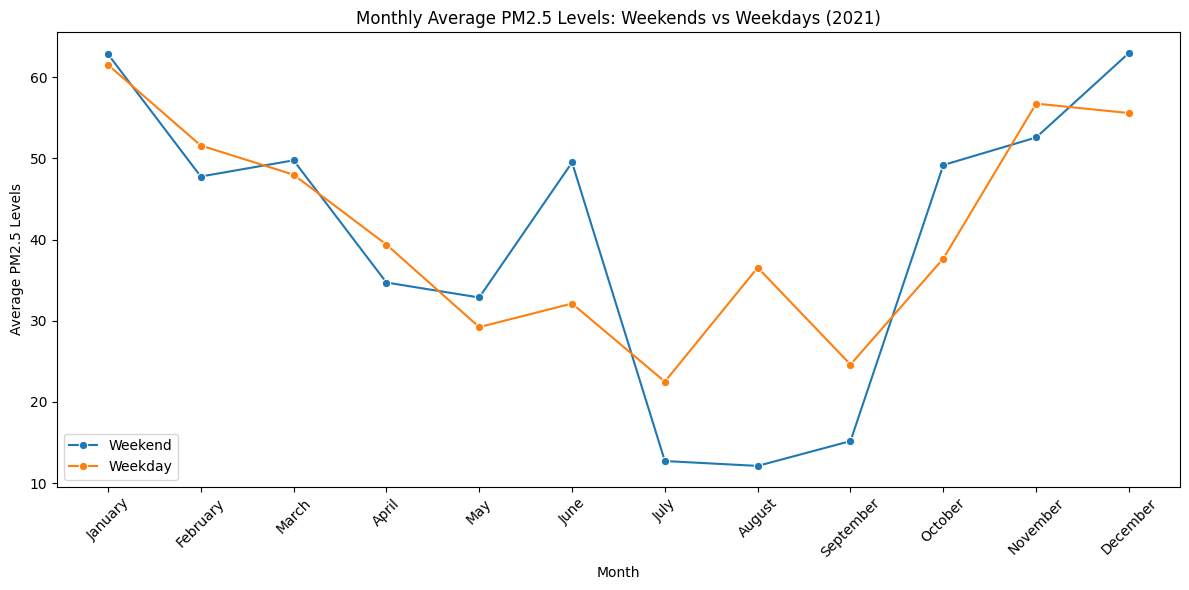

In [30]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

weekend_monthly_avg = weekend_monthly_avg.reindex(month_order)
weekday_monthly_avg = weekday_monthly_avg.reindex(month_order)

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekend_monthly_avg, marker='o', label='Weekend')
sns.lineplot(data=weekday_monthly_avg, marker='o', label='Weekday')

plt.xlabel('Month')
plt.ylabel('Average PM2.5 Levels')
plt.title('Monthly Average PM2.5 Levels: Weekends vs Weekdays (2021)')
plt.xticks(range(len(month_order)), month_order, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Spatio-temporal Aggregation

# 1.

In [31]:
monsoon_state_df = aq_df.loc[aq_df['season'] == 'Monsoon'].groupby('state', observed = True)['PM2.5'].mean()

In [32]:
display(monsoon_state_df)

state
Andhra Pradesh       22.321535
Arunachal Pradesh    14.174960
Assam                28.899935
Bihar                34.466310
Chandigarh           31.684770
Chhattisgarh         18.014172
Delhi                43.499433
Gujarat              33.643018
Haryana              41.998921
Himachal Pradesh     38.957413
Jammu and Kashmir    24.225855
Jharkhand            41.607757
Karnataka            18.233204
Kerala               20.987046
Madhya Pradesh       22.917788
Maharashtra          20.251987
Manipur              12.721926
Meghalaya            14.686408
Mizoram               3.608824
Nagaland             17.926081
Odisha               26.286578
Puducherry           15.317670
Punjab               36.581875
Rajasthan            34.328824
Sikkim                5.528110
Tamil Nadu           23.673859
Telangana            22.645049
Tripura              24.196730
Uttar Pradesh        33.289232
Uttarakhand          21.564999
West Bengal          23.877086
Name: PM2.5, dtype: float64

In [33]:
summer_state_df = aq_df.loc[aq_df['season'] == 'Summer'].groupby('state', observed = True)['PM2.5'].mean()

In [34]:
display(summer_state_df)

state
Andhra Pradesh       31.863212
Arunachal Pradesh    28.168113
Assam                61.224049
Bihar                67.358306
Chandigarh           49.617280
Chhattisgarh         29.712118
Delhi                80.016542
Gujarat              55.104976
Haryana              63.905433
Himachal Pradesh     49.404850
Jammu and Kashmir    27.995627
Jharkhand            51.573458
Karnataka            31.986897
Kerala               30.040147
Madhya Pradesh       42.418641
Maharashtra          43.597015
Manipur              31.564517
Meghalaya            32.823934
Mizoram              18.731914
Nagaland             47.292721
Odisha               53.073497
Puducherry           19.751766
Punjab               46.986272
Rajasthan            49.618382
Sikkim               15.437000
Tamil Nadu           29.079147
Telangana            40.912933
Tripura              56.747395
Uttar Pradesh        58.372908
Uttarakhand          36.341554
West Bengal          44.374502
Name: PM2.5, dtype: float64

In [35]:
pd.DataFrame(summer_state_df)

,PM2.5
state,
Andhra Pradesh,31.863212
Arunachal Pradesh,28.168113
Assam,61.224049
Bihar,67.358306
Chandigarh,49.617280
Chhattisgarh,29.712118
Delhi,80.016542
Gujarat,55.104976
Haryana,63.905433


In [36]:
pd.DataFrame(monsoon_state_df)

,PM2.5
state,
Andhra Pradesh,22.321535
Arunachal Pradesh,14.174960
Assam,28.899935
Bihar,34.466310
Chandigarh,31.684770
Chhattisgarh,18.014172
Delhi,43.499433
Gujarat,33.643018
Haryana,41.998921


In [37]:
merged_df = pd.merge(summer_state_df, monsoon_state_df, on='state')

In [38]:
display(merged_df)

,PM2.5_x,PM2.5_y
state,,
Andhra Pradesh,31.863212,22.321535
Arunachal Pradesh,28.168113,14.174960
Assam,61.224049,28.899935
Bihar,67.358306,34.466310
Chandigarh,49.617280,31.684770
Chhattisgarh,29.712118,18.014172
Delhi,80.016542,43.499433
Gujarat,55.104976,33.643018
Haryana,63.905433,41.998921


In [39]:
merged_df.columns = ['summer_PM2.5', 'Monsoon_PM2.5']

In [40]:
display(merged_df)

,summer_PM2.5,Monsoon_PM2.5
state,,
Andhra Pradesh,31.863212,22.321535
Arunachal Pradesh,28.168113,14.174960
Assam,61.224049,28.899935
Bihar,67.358306,34.466310
Chandigarh,49.617280,31.684770
Chhattisgarh,29.712118,18.014172
Delhi,80.016542,43.499433
Gujarat,55.104976,33.643018
Haryana,63.905433,41.998921


In [41]:
merged_df['Percentage Change'] = (merged_df['Monsoon_PM2.5'] - merged_df['summer_PM2.5'])/(merged_df['summer_PM2.5'])* 100

In [42]:
display(merged_df)

,summer_PM2.5,Monsoon_PM2.5,Percentage Change
state,,,
Andhra Pradesh,31.863212,22.321535,-29.945748
Arunachal Pradesh,28.168113,14.174960,-49.677283
Assam,61.224049,28.899935,-52.796433
Bihar,67.358306,34.466310,-48.831388
Chandigarh,49.617280,31.684770,-36.141662
Chhattisgarh,29.712118,18.014172,-39.370959
Delhi,80.016542,43.499433,-45.636950
Gujarat,55.104976,33.643018,-38.947405
Haryana,63.905433,41.998921,-34.279577


In [43]:
monsoon2022_state_df = aq_df.loc[(aq_df['season'] == 'Monsoon') & (aq_df['Timestamp'].dt.year == 2022)].groupby('state', observed = True)['PM2.5'].mean()

In [44]:
summer2022_state_df = aq_df.loc[(aq_df['season'] == 'Summer') & (aq_df['Timestamp'].dt.year == 2022)].groupby('state', observed = True)['PM2.5'].mean()

In [45]:
merged2022_df = pd.merge(summer_state_df, monsoon_state_df, on='state')

In [46]:
merged2022_df.columns = ['summer_PM2.5', 'Monsoon_PM2.5']

In [47]:
merged2022_df['Percentage Change'] = (merged2022_df['Monsoon_PM2.5'] - merged2022_df['summer_PM2.5'])/(merged2022_df['summer_PM2.5'])* 100

In [48]:
display(merged2022_df)

,summer_PM2.5,Monsoon_PM2.5,Percentage Change
state,,,
Andhra Pradesh,31.863212,22.321535,-29.945748
Arunachal Pradesh,28.168113,14.174960,-49.677283
Assam,61.224049,28.899935,-52.796433
Bihar,67.358306,34.466310,-48.831388
Chandigarh,49.617280,31.684770,-36.141662
Chhattisgarh,29.712118,18.014172,-39.370959
Delhi,80.016542,43.499433,-45.636950
Gujarat,55.104976,33.643018,-38.947405
Haryana,63.905433,41.998921,-34.279577


In [49]:
merged2022_df.loc[merged2022_df['Percentage Change'].idxmin()]

summer_PM2.5         18.731914
Monsoon_PM2.5         3.608824
Percentage Change   -80.734355
Name: Mizoram, dtype: float64

Thus, Mizoram had the highest percentage change in 2022

In [50]:
Delhi_data = aq_df.loc[(aq_df['city'] == 'Delhi') & (aq_df['Timestamp'].dt.year >= 2017) & (aq_df['Timestamp'].dt.year <=2023)]
display(Delhi_data)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,season,day,month,is_weekend
7,2017-01-01,"Alipur, Delhi - DPCC",NaN,NaN,Mahatma Gandhi Insititute for Combating Climat...,Delhi,28.815329,77.153010,Delhi,Winter,Sunday,January,True
10,2017-01-01,"Anand Vihar, Delhi - DPCC",199.514167,360.567708,NaN,Delhi,28.647622,77.315809,Delhi,Winter,Sunday,January,True
18,2017-01-01,"Ashok Vihar, Delhi - DPCC",NaN,NaN,NaN,Delhi,28.695381,77.181665,Delhi,Winter,Sunday,January,True
20,2017-01-01,"Aya Nagar, Delhi - IMD",NaN,NaN,NaN,Delhi,28.470691,77.109936,Delhi,Winter,Sunday,January,True
35,2017-01-01,"Bawana, Delhi - DPCC",NaN,NaN,NaN,Delhi,28.776200,77.051074,Delhi,Winter,Sunday,January,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433852,2023-12-31,"Sirifort, Delhi - CPCB",255.121772,384.209302,NaN,Delhi,28.550425,77.215938,Delhi,Winter,Sunday,December,True
1433857,2023-12-31,"Sonia Vihar, Delhi - DPCC",230.572917,342.875000,NaN,Delhi,28.710508,77.249485,Delhi,Winter,Sunday,December,True
1433858,2023-12-31,"Sri Aurobindo Marg, Delhi - DPCC",262.927083,379.729167,NaN,Delhi,28.531346,77.190156,Delhi,Winter,Sunday,December,True
1433907,2023-12-31,"Vivek Vihar, Delhi - DPCC",237.604167,425.343750,"Vivek Vihar, 110095",Delhi,28.672342,77.315260,Delhi,Winter,Sunday,December,True


<Axes: xlabel='season', ylabel='PM2.5'>

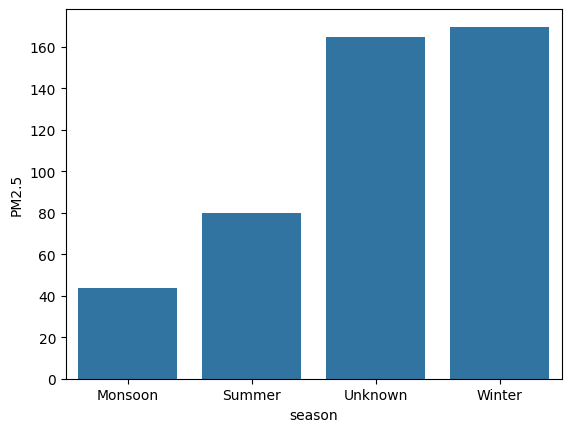

In [51]:
sns.barplot(Delhi_data.groupby('season')['PM2.5'].mean())

Thus, it can be seen that pollution is at its lowest in Monsoon and its peak in  Winters. Also, the Unknown (or should have been Unclassified instead) contains October and November. The pollution is almost as high in these months as the winters.

# 3.

In [52]:
Delhi_df = aq_df.loc[aq_df['city'] == 'Delhi'].groupby(aq_df['Timestamp'].dt.year)['PM2.5'].mean()

In [53]:
display(Delhi_df)

Timestamp
2017    130.857720
2018    113.206232
2019    108.578564
2020     95.639458
2021    105.401629
2022     99.017342
2023    102.183923
2024     98.619420
Name: PM2.5, dtype: float64

In [54]:
Mumbai_df = aq_df.loc[aq_df['city'] == 'Mumbai'].groupby(aq_df['Timestamp'].dt.year)['PM2.5'].mean()

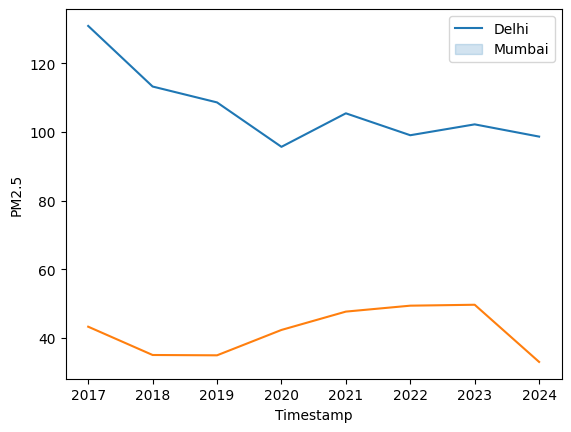

In [55]:
sns.lineplot(Delhi_df)
sns.lineplot(Mumbai_df)
plt.legend(['Delhi', 'Mumbai'])
plt.show()

In [56]:
print(Delhi_df.std())

11.327524416193064


In [57]:
print(Mumbai_df.std())

6.829562245494815


Delhi seems to have larger variation graphically. I have also verified it by calculating the standard deviation.

# Population_Based

# 1.

In [58]:
statewise_stations = aq_df.groupby('state')['station'].nunique()

In [59]:
display(statewise_stations)

state
Andhra Pradesh       13
Arunachal Pradesh     1
Assam                 9
Bihar                36
Chandigarh            3
Chhattisgarh         14
Delhi                40
Gujarat              17
Haryana              30
Himachal Pradesh      1
Jammu and Kashmir     1
Jharkhand             4
Karnataka            42
Kerala                9
Madhya Pradesh       29
Maharashtra          97
Manipur               2
Meghalaya             2
Mizoram               1
Nagaland              1
Odisha               19
Puducherry            1
Punjab                8
Rajasthan            46
Sikkim                1
Tamil Nadu           36
Telangana            14
Tripura               2
Uttar Pradesh        57
Uttarakhand           3
West Bengal          22
Name: station, dtype: int64

In [60]:
state_data = pd.read_csv('State_data.csv')
display(state_data)

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252
5,Tamil Nadu,72147030,130058
6,Rajasthan,68548437,342239
7,Karnataka,61095297,191791
8,Gujarat,60439692,196024
9,Andhra Pradesh,49577103,162975


In [61]:
state_data.columns = ['state', 'Population', 'Area(km2)']

In [62]:
statewise_stations = pd.merge(statewise_stations, state_data, on='state')

In [63]:
display(statewise_stations)

,state,station,Population,Area(km2)
0,Andhra Pradesh,13,49577103,162975
1,Arunachal Pradesh,1,1383727,83743
2,Assam,9,31205576,78438
3,Bihar,36,104099452,94163
4,Chandigarh,3,1055450,114
5,Chhattisgarh,14,25545198,135192
6,Delhi,40,16787941,1484
7,Gujarat,17,60439692,196024
8,Haryana,30,25351462,44212
9,Himachal Pradesh,1,6864602,55673


In [64]:
statewise_stations['stations by population'] = statewise_stations['station']/statewise_stations['Population']

In [65]:
statewise_stations.loc[statewise_stations['stations by population'].idxmax()]

state                     Chandigarh
station                            3
Population                   1055450
Area(km2)                        114
stations by population      0.000003
Name: 4, dtype: object

Thus, Chandigarh has the most number of stations by population.

# 2.

In [66]:
statewise_pollution = aq_df.loc[aq_df['Timestamp'].dt.year == 2023].groupby('state')['PM2.5'].mean()

In [67]:
statewise_pollution = pd.merge(statewise_pollution, state_data, on='state')

In [68]:
display(statewise_pollution)

,state,PM2.5,Population,Area(km2)
0,Andhra Pradesh,36.294259,49577103,162975
1,Arunachal Pradesh,22.368565,1383727,83743
2,Assam,59.685088,31205576,78438
3,Bihar,77.647134,104099452,94163
4,Chandigarh,59.414055,1055450,114
5,Chhattisgarh,28.760103,25545198,135192
6,Delhi,102.183923,16787941,1484
7,Gujarat,51.507093,60439692,196024
8,Haryana,67.117568,25351462,44212
9,Himachal Pradesh,60.173842,6864602,55673


In [69]:
statewise_pollution['Per Capita PM2.5'] = statewise_pollution['PM2.5']/statewise_pollution['Population']

In [70]:
statewise_pollution.nlargest(5, 'Per Capita PM2.5')

,state,PM2.5,Population,Area(km2),Per Capita PM2.5
4,Chandigarh,59.414055,1055450,114,0.000056
24,Sikkim,14.927530,610577,7096,0.000024
27,Tripura,80.469872,3673917,10491,0.000022
21,Puducherry,24.286078,1247953,479,0.000019
19,Nagaland,32.721157,1978502,16579,0.000017


<BarContainer object of 5 artists>

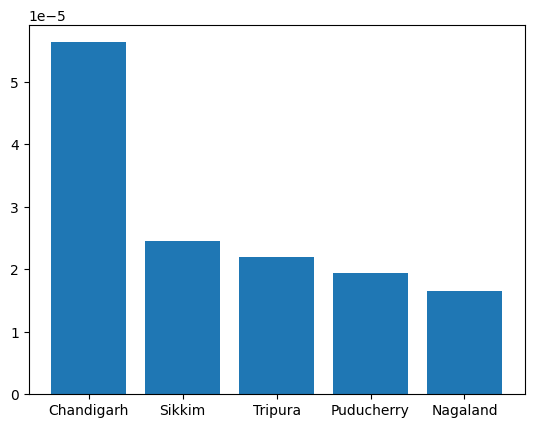

In [71]:
plt.bar(statewise_pollution.nlargest(5, 'Per Capita PM2.5')['state'], statewise_pollution.nlargest(5, 'Per Capita PM2.5')['Per Capita PM2.5'])

# 3.

In [72]:
statewise_pollution['population_density'] = statewise_pollution['Population']/statewise_pollution['Area(km2)']

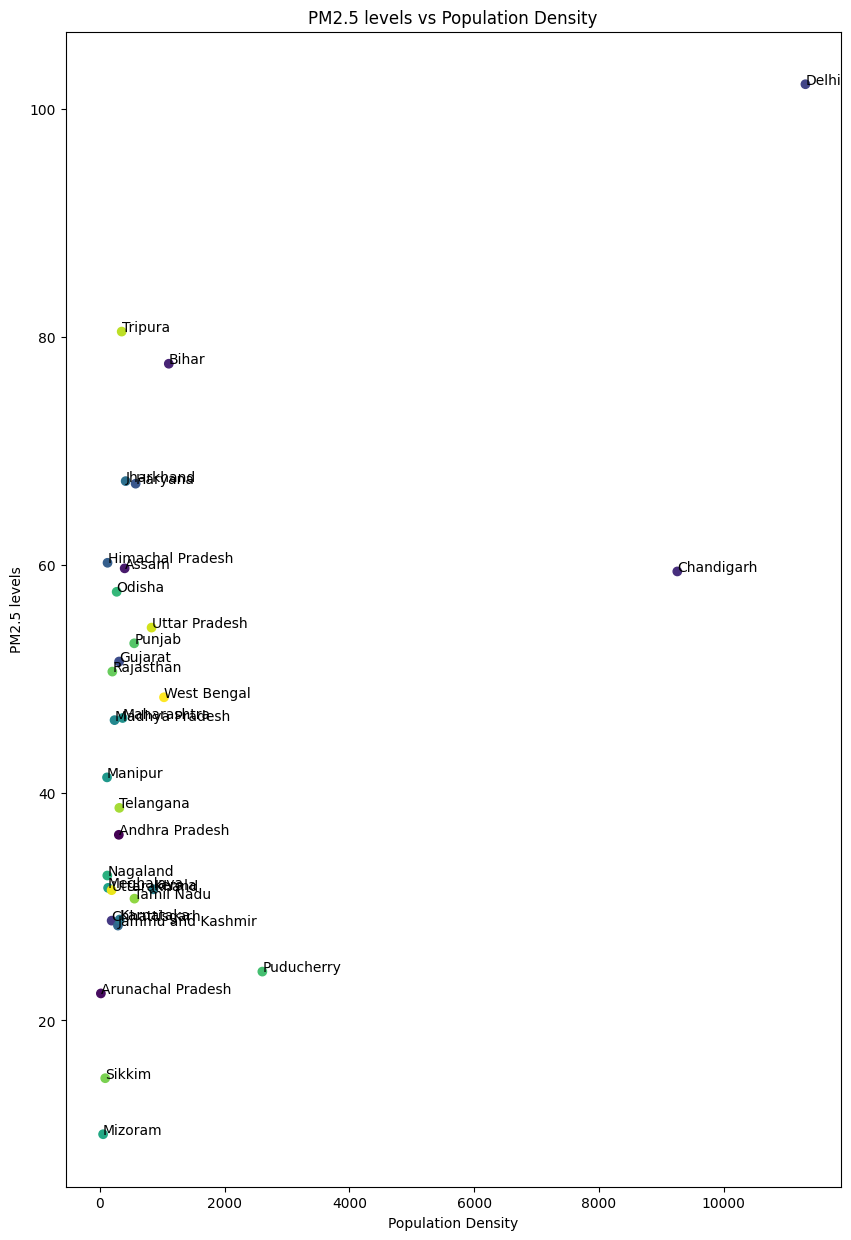

In [73]:
plt.figure(figsize = (10, 15))
colors = plt.cm.viridis(np.linspace(0, 1, statewise_pollution.shape[0]))
plt.scatter(statewise_pollution['population_density'], statewise_pollution['PM2.5'], color = colors)
plt.title('PM2.5 levels vs Population Density')
plt.xlabel('Population Density')
plt.ylabel('PM2.5 levels')

for i, state in enumerate(statewise_pollution['state']):
    plt.annotate(state, (statewise_pollution['population_density'][i], statewise_pollution['PM2.5'][i]))

# Funding

# 1.

# 2.

# 3.

# Miscellaneous Questions

# 1.

In [74]:
statewise_pollution.loc[statewise_pollution['PM2.5'].idxmax()]

state                        Delhi
PM2.5                   102.183923
Population                16787941
Area(km2)                     1484
Per Capita PM2.5          0.000006
population_density    11312.628706
Name: 6, dtype: object

In [75]:
aq_df.loc[(aq_df['Timestamp'].dt.year == 2023) & (aq_df['state'] == 'Delhi') & (aq_df['PM2.5'] >= 300), 'Timestamp'].nunique()/365 * 100

13.424657534246576

Delhi (the most polluted state or union territory in India in 2023) observed hazardous pollution on 13.42% days in 2023.

# 2.

In [76]:
Delhi2018_2020 = aq_df.loc[(aq_df['city'] == 'Delhi') & (aq_df['Timestamp'].dt.year >= 2018) & (aq_df['Timestamp'].dt.year <= 2020)]

In [107]:
display(Delhi2018_2020.loc[(Delhi2018_2020['Timestamp'].dt.month == 10) | (Delhi2018_2020['Timestamp'].dt.month == 11)].groupby('Timestamp', observed = 'True')['PM2.5'].mean().nlargest(10))

Timestamp
2019-11-03    544.710998
2020-11-09    521.682125
2020-11-10    451.726291
2019-11-15    422.658175
2020-11-14    392.898466
2019-11-12    386.429057
2019-11-13    383.408705
2019-11-01    378.636198
2019-11-14    370.604212
2018-11-08    369.330674
Name: PM2.5, dtype: float64

In [118]:
display(Delhi2018_2020.loc[(Delhi2018_2020['Timestamp'].dt.month == 12) & (Delhi2018_2020['Timestamp'].dt.day == 31)].groupby('Timestamp', observed = 'True')['PM2.5'].mean())

Timestamp
2018-12-31    312.949345
2019-12-31    257.579986
2020-12-31    226.180725
Name: PM2.5, dtype: float64

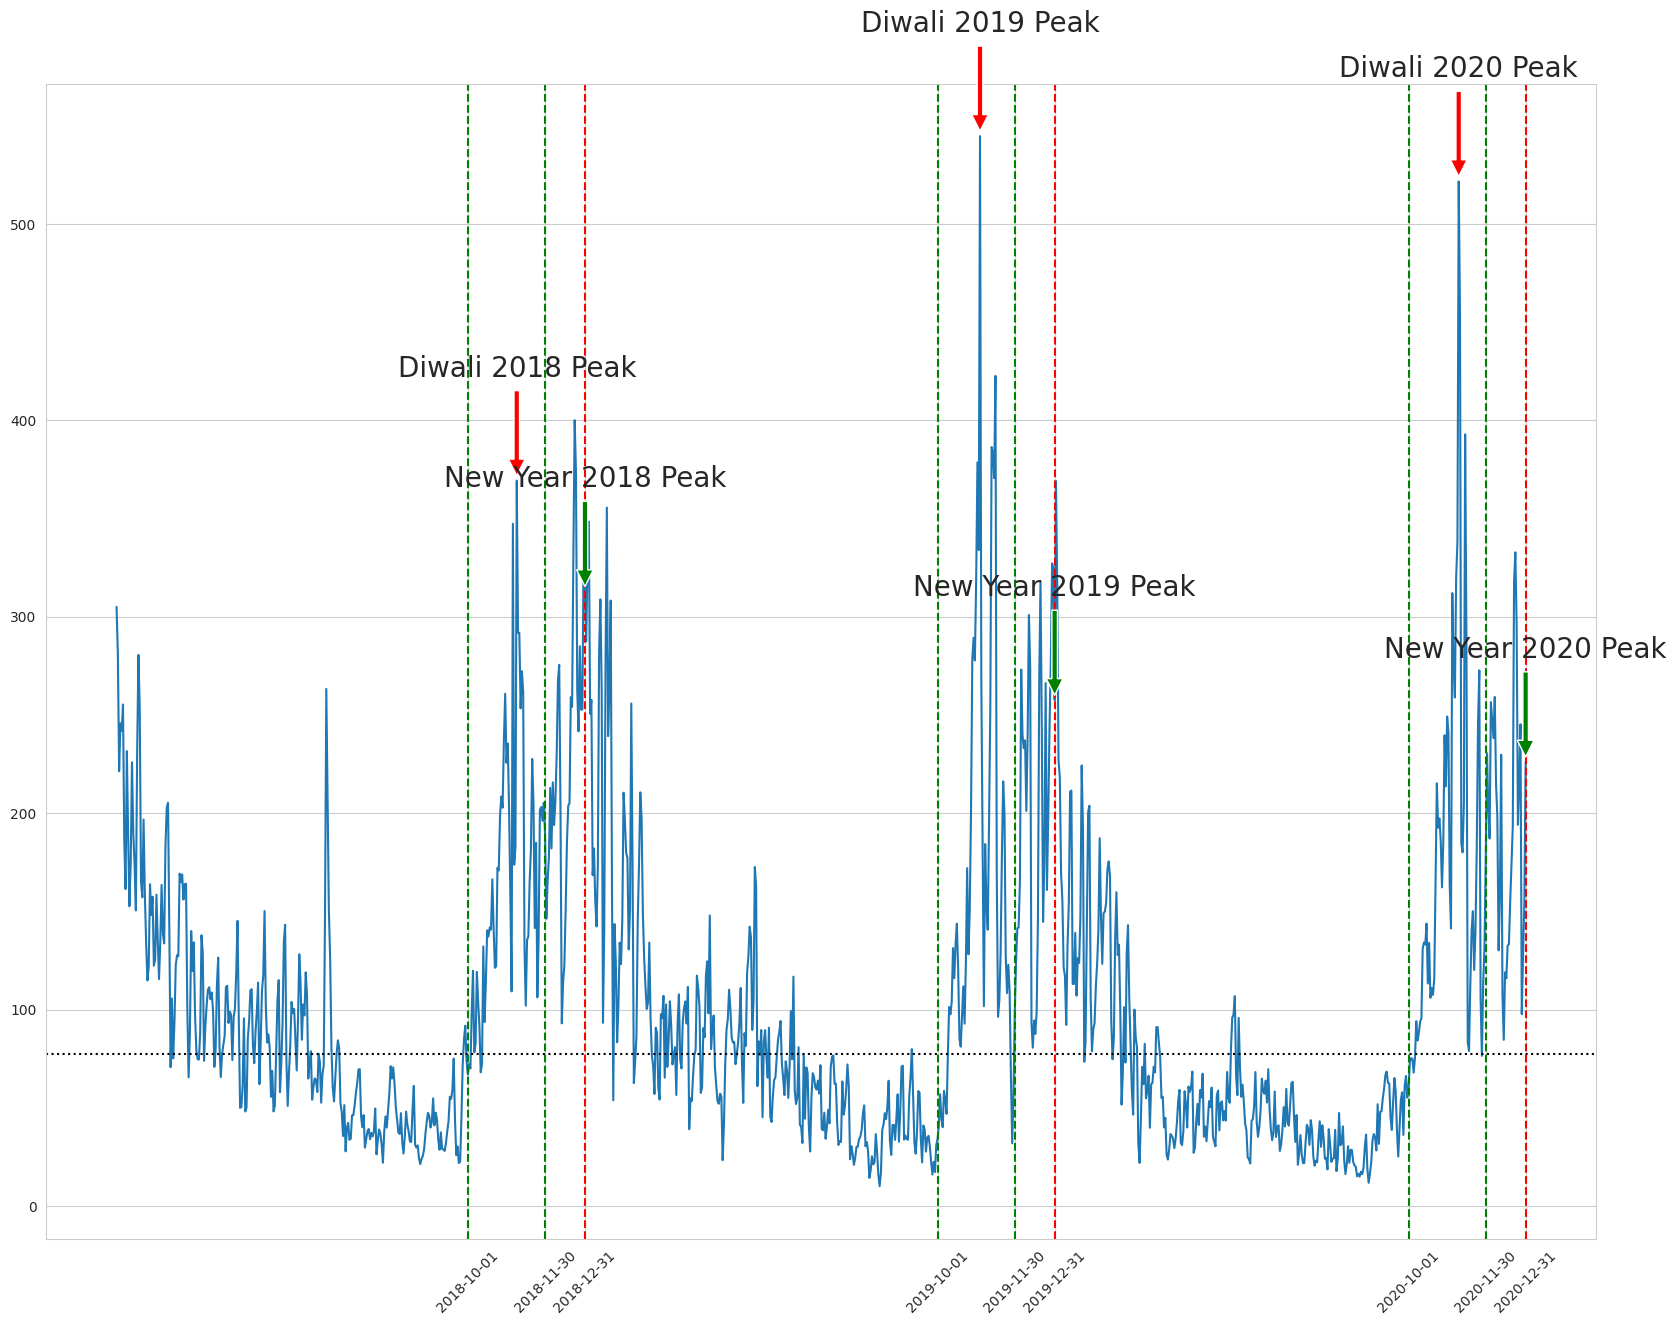

In [119]:
plt.figure(figsize = (20, 15))
plt.plot(Delhi2018_2020['Timestamp'].unique(), Delhi2018_2020.groupby('Timestamp', observed = 'True')['PM2.5'].mean())
plt.xticks(['2018-10-01', '2018-11-30', '2018-12-31', '2019-10-01', '2019-11-30', '2019-12-31', '2020-10-01', '2020-11-30', '2020-12-31'], rotation = 45)
plt.annotate('Diwali 2018 Peak',
             xy = (pd.to_datetime('2018-11-08'), 369.330674),
             xytext = (pd.to_datetime('2018-11-08'), 369.330674+50),
            arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=20,
                ha='center', va='bottom')
plt.annotate('Diwali 2019 Peak',
             xy = (pd.to_datetime('2019-11-03'),544.710998),
             xytext = (pd.to_datetime('2019-11-03'), 544.710998+50),
            arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=20,
                ha='center', va='bottom')
plt.annotate('Diwali 2020 Peak',
             xy = (pd.to_datetime('2020-11-09'), 521.682125),
             xytext = (pd.to_datetime('2020-11-09'), 521.682125+50),
            arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=20,
                ha='center', va='bottom')
plt.annotate('New Year 2018 Peak',
             xy = (pd.to_datetime('2018-12-31'), 312.949345),
             xytext = (pd.to_datetime('2018-12-31'), 312.949345+50),
            arrowprops=dict(facecolor='green', shrink=0.05),
                fontsize=20,
                ha='center', va='bottom')
plt.annotate('New Year 2019 Peak',
             xy = (pd.to_datetime('2019-12-31'), 257.579986),
             xytext = (pd.to_datetime('2019-12-31'), 257.579986+50),
            arrowprops=dict(facecolor='green', shrink=0.05),
                fontsize=20,
                ha='center', va='bottom')
plt.annotate('New Year 2020 Peak',
             xy = (pd.to_datetime('2020-12-31'), 226.180725),
             xytext = (pd.to_datetime('2020-12-31'), 226.180725+50),
            arrowprops=dict(facecolor='green', shrink=0.05),
                fontsize=20,
                ha='center', va='bottom')
plt.axvline(x = pd.to_datetime('2018-10-01'), linestyle = '--', color = 'green')
plt.axvline(x = pd.to_datetime('2018-11-30'), linestyle = '--', color = 'green')
plt.axvline(x = pd.to_datetime('2019-10-01'), linestyle = '--', color = 'green')
plt.axvline(x = pd.to_datetime('2019-11-30'), linestyle = '--', color = 'green')
plt.axvline(x = pd.to_datetime('2020-10-01'), linestyle = '--', color = 'green')
plt.axvline(x = pd.to_datetime('2020-11-30'), linestyle = '--', color = 'green')
plt.axvline(x = pd.to_datetime('2018-12-31'), linestyle = '--', color = 'red')
plt.axvline(x = pd.to_datetime('2019-12-31'), linestyle = '--', color = 'red')
plt.axvline(x = pd.to_datetime('2020-12-31'), linestyle = '--', color = 'red')
median_pollution = Delhi2018_2020['PM2.5'].median()
plt.axhline(y = median_pollution, linestyle = ':', color = 'black')
plt.show()

Thus, it can be seen that the pollution level rises especially during Diwali. 2019 and 2020 saw the maximum pollution in the Diwali Months. Before October, the pollution levels are around the median levels or even below it. In October and November, pollution levels peak. While New Year does not have as high levels of pollution as Diwali, it is still considerably higher than the median level which is plotted with the black dotted line.

# 3.

In [167]:
ncap_funding = pd.read_csv('NCAP_Funding.csv')
display(ncap_funding)

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91
...,...,...,...,...,...,...,...,...
112,113,West Bengal,Kolkata,6,-,-,6.00,19
113,114,West Bengal,Howrah,-,5,-,5.00,19
114,115,West Bengal,Haldia,-,3,-,3.00,19
115,116,West Bengal,Durgapur,-,3,-,3.00,19


In [168]:
ncap_funding = ncap_funding.replace('-', 0)
ncap_funding['Amount released during FY 2020-21'] = ncap_funding['Amount released during FY 2020-21'].astype(float)
display(ncap_funding)

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,0.00,0,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,0.00,0,0.12,22.91
...,...,...,...,...,...,...,...,...
112,113,West Bengal,Kolkata,6,0.00,0,6.00,19
113,114,West Bengal,Howrah,0,5.00,0,5.00,19
114,115,West Bengal,Haldia,0,3.00,0,3.00,19
115,116,West Bengal,Durgapur,0,3.00,0,3.00,19


In [132]:
ncap_funding.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()

'Andhra Pradesh'

In [134]:
aq_df['year'] = aq_df['Timestamp'].dt.year

In [141]:
aq_df.loc[aq_df['state'] == 'Andhra Pradesh'].groupby('year')['PM2.5'].mean()[[2020, 2021, 2022, 2023]]

year
2020    30.425130
2021    33.316491
2022    34.334527
2023    36.294259
Name: PM2.5, dtype: float64

<Axes: xlabel='year', ylabel='PM2.5'>

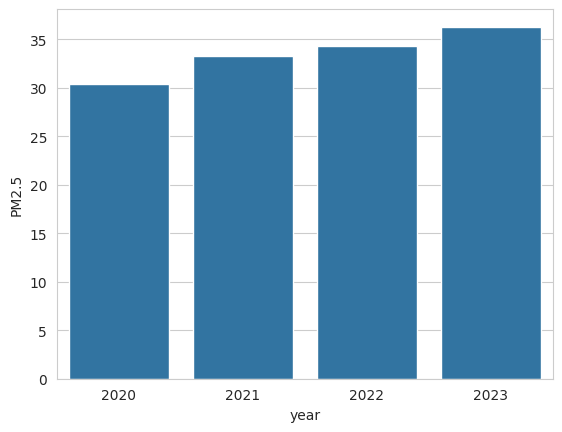

In [143]:
sns.barplot(aq_df.loc[aq_df['state'] == 'Andhra Pradesh'].groupby('year')['PM2.5'].mean()[[2020, 2021, 2022, 2023]])

Thus, it can be seen that despite the NCAP Funding, pollution has worsened in Andhra Pradesh.

# 4.

In [77]:
!pip install geopandas

In [78]:
import geopandas as gpd
from shapely.geometry import Point
sns.set_style('whitegrid')

In [79]:
!pip install geodatasets

In [144]:
import geodatasets

In [145]:
from shapely.geometry import box

In [148]:
!pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.0 MB/s eta 0:00:00


In [149]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.1 MB/s eta 0:00:00


,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,geometry
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh,POINT (81.31477 21.19482)
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh,POINT (81.57898 21.25882)
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan,POINT (75.83686 26.90291)
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra,POINT (72.9986 19.1494)
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY


,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,geometry
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh,POINT (81.31477 21.19482)
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh,POINT (81.57898 21.25882)
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan,POINT (75.83686 26.90291)
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra,POINT (72.9986 19.1494)
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY


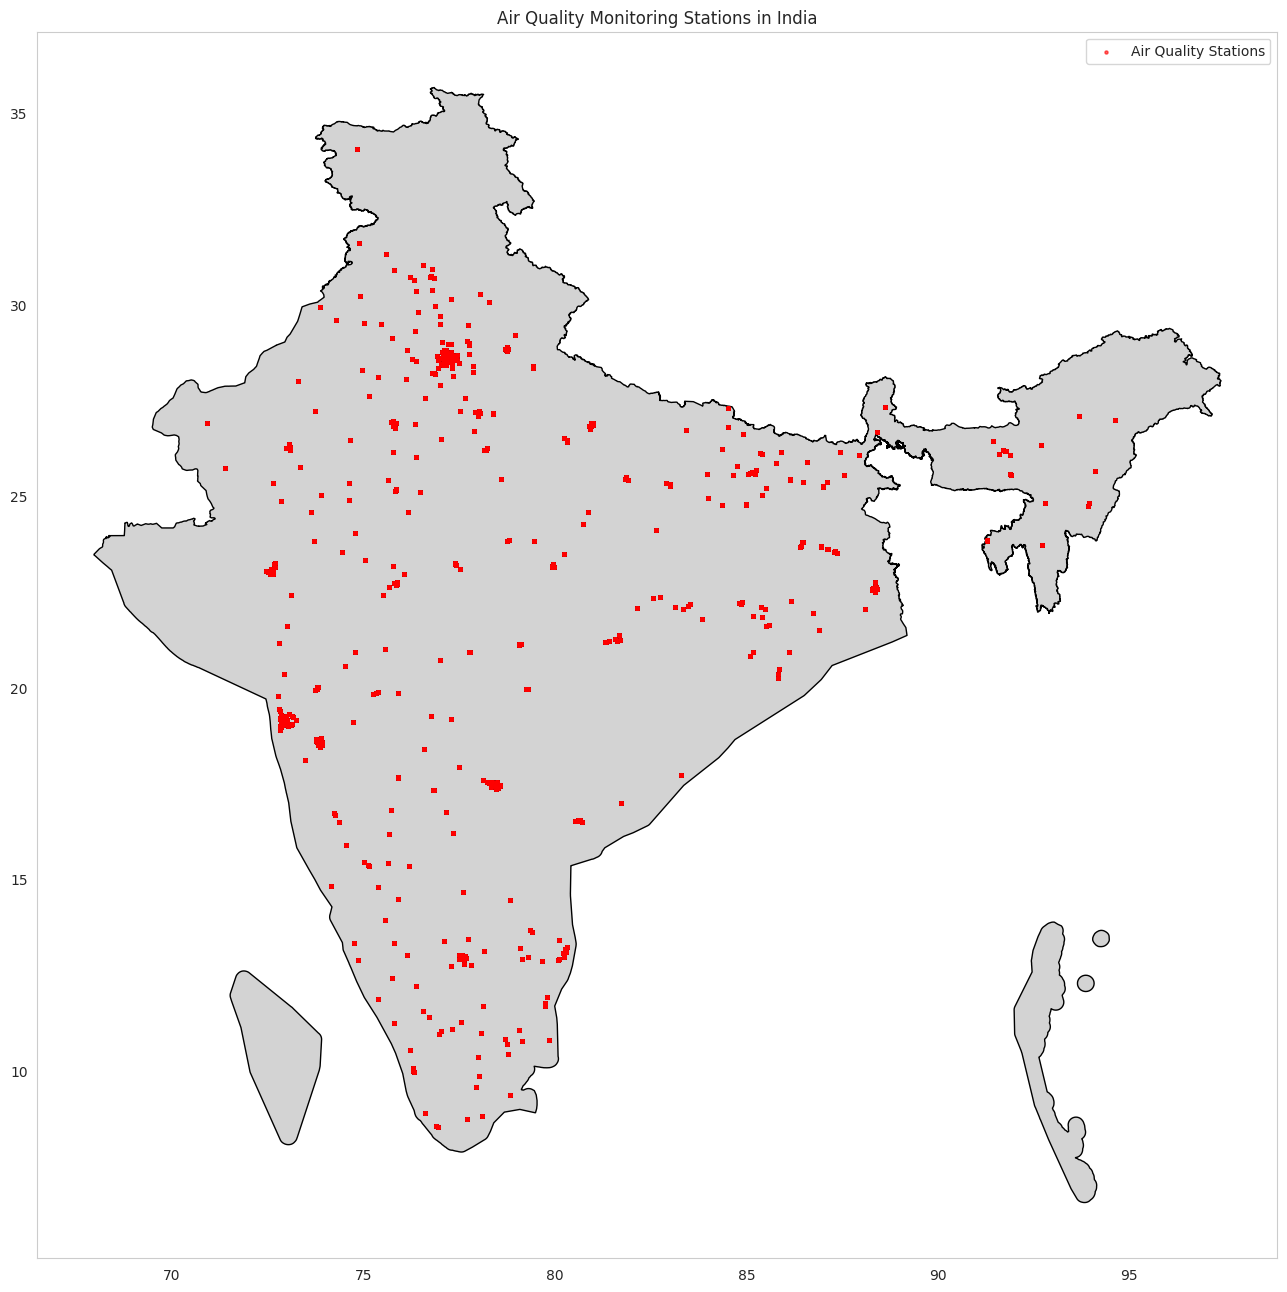

In [211]:
india = gpd.read_file("https://nominatim.openstreetmap.org/search?country=India&polygon_geojson=1&format=geojson")
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

display(data.head())

data["geometry"] = gpd.points_from_xy(data["longitude"], data["latitude"])
geo_data = gpd.GeoDataFrame(data, geometry="geometry")

display(geo_data.head())
fig, ax = plt.subplots(figsize=(16, 20))
india.plot(ax=ax, color="lightgray", edgecolor="black")
geo_data.plot(ax=ax, markersize=5, color="red", alpha=0.6, label="Air Quality Stations")
plt.title("Air Quality Monitoring Stations in India")
plt.legend()
plt.grid()
plt.show()

In [ ]:
display(india)

# Funding

# 1.

In [169]:
ncap_funding.columns

Index(['S. No.', 'State', 'City', 'Amount released during FY 2019-20',
       'Amount released during FY 2020-21',
       'Amount released during FY 2021-22', 'Total fund released',
       'Utilisation as on June 2022'],
      dtype='object')

In [170]:
ncap_funding.columns = ['S. No.', 'State', 'City', 'Amount_2019_20',
       'Amount_2020_21',
       'Amount_2021_22', 'Total_fund_released',
       'Utilisation_June_2022']

In [171]:
ncap_funding['Amount_2021_22'] = ncap_funding['Amount_2021_22'].astype(float)

In [175]:
ncap_funding.groupby('State')['Amount_2021_22'].sum()

State
Andhra Pradesh      11.48
Assam                0.00
Bihar                4.40
Chandigarh           4.61
Chhattisgarh         0.00
Delhi               11.25
Gujarat              0.00
Himachal Pradesh     0.48
Jammu & Kashmir     12.84
Jharkhand            0.00
Karnataka            7.32
Madhya Pradesh       5.02
Maharashtra         11.90
Meghalaya            0.00
Nagaland             0.93
Odisha               3.64
Punjab               0.00
Rajasthan            0.00
Tamil Nadu           0.00
Telangana            0.79
Uttar Pradesh       16.31
Uttarakhand          5.67
West Bengal          0.00
Name: Amount_2021_22, dtype: float64

In [187]:
state_funding = pd.DataFrame(ncap_funding.groupby('State')['Amount_2021_22'].sum())

In [188]:
state_funding.columns

Index(['Amount_2021_22'], dtype='object')

In [189]:
state_funding = state_funding.rename_axis('state')

In [191]:
state_funding = pd.merge(state_funding, aq_df.loc[aq_df['Timestamp'].dt.year == 2021].groupby('state')['PM2.5'].mean(), on = 'state')

In [192]:
display(state_funding)

,Amount_2021_22,PM2.5
state,,
Andhra Pradesh,11.48,33.316491
Assam,0.00,61.017780
Bihar,4.40,81.967836
Chandigarh,4.61,44.360885
Chhattisgarh,0.00,24.863968
Delhi,11.25,105.401629
Gujarat,0.00,50.780194
Himachal Pradesh,0.48,NaN
Jharkhand,0.00,NaN


In [193]:
state_funding['amount_2021'] = (state_funding['Amount_2021_22'] > 0)

In [194]:
display(state_funding)

,Amount_2021_22,PM2.5,amount_2021
state,,,
Andhra Pradesh,11.48,33.316491,True
Assam,0.00,61.017780,False
Bihar,4.40,81.967836,True
Chandigarh,4.61,44.360885,True
Chhattisgarh,0.00,24.863968,False
Delhi,11.25,105.401629,True
Gujarat,0.00,50.780194,False
Himachal Pradesh,0.48,NaN,True
Jharkhand,0.00,NaN,False


In [196]:
state_funding.groupby('amount_2021')['PM2.5'].mean()

amount_2021
False    43.876429
True     52.620111
Name: PM2.5, dtype: float64

# 2.

In [220]:
Assam_2019 = ncap_funding.loc[ncap_funding['State'] == 'Assam', 'Amount_2019_20'].sum()
Assam_2020 = ncap_funding.loc[ncap_funding['State'] == 'Assam', 'Amount_2020_21'].sum()

In [223]:
a = aq_df.loc[aq_df['state'] == 'Assam'].groupby('year')['PM2.5'].mean()

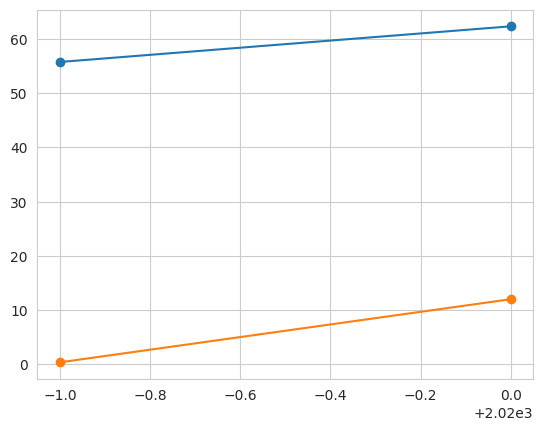

In [225]:
plt.plot([2019, 2020], [a[2019], a[2020]], marker = 'o')
plt.plot([2019, 2020], [Assam_2019, Assam_2020], marker = 'o')

# 3.

In [197]:
ncap_funding['Amount_2019_20'] = ncap_funding['Amount_2019_20'].astype(float)
ncap_funding['Amount_2020_21'] = ncap_funding['Amount_2020_21'].astype(float)

In [202]:
state_total_funds = ncap_funding.groupby('State')['Total_fund_released'].sum()

In [203]:
state_total_funds = state_total_funds.rename_axis('state')

In [205]:
area_by_funding = pd.merge(state_total_funds, statewise_pollution, on = 'state')

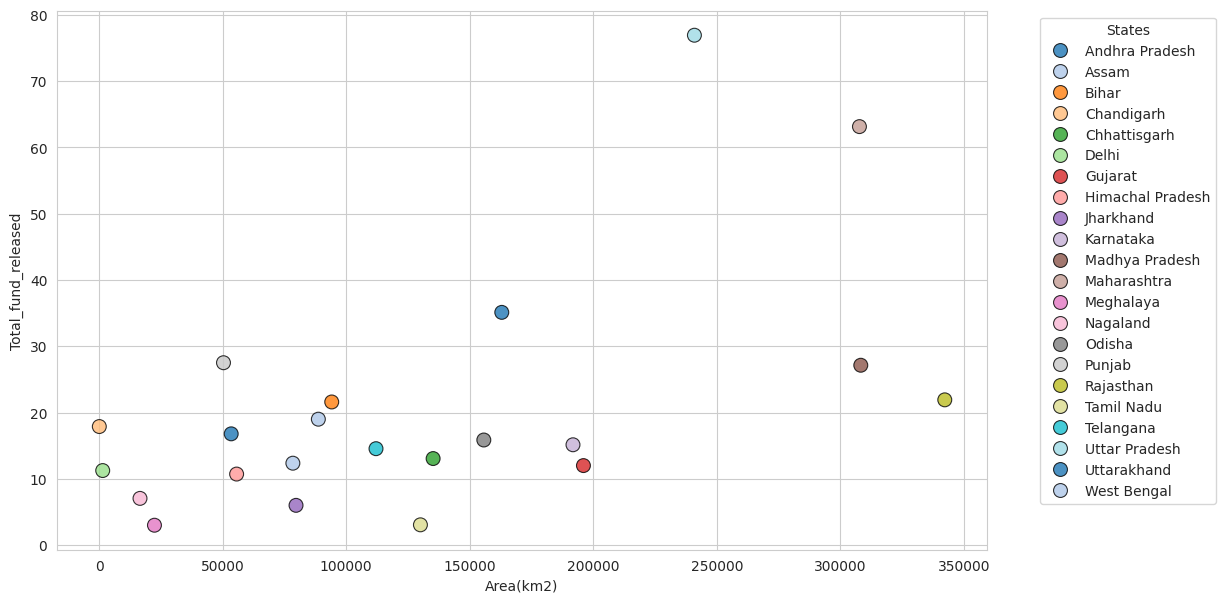

In [218]:
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    x=area_by_funding["Area(km2)"],
    y=area_by_funding["Total_fund_released"],
    hue=area_by_funding["state"],
    palette="tab20",
    s=100,
    edgecolor="black",
    alpha=0.8
)

plt.legend(title="States", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [ ]:
# Finding some new relation